In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [2]:
url = "https://raw.githubusercontent.com/Hunteracademic/Unsupervised_assignment_1/master/patient_priority.csv"
df = pd.read_csv(url)
df = df.drop("triage", axis=1)
df.head()

,Unnamed: 0,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [3]:
print(df.isna().sum()[df.isna().sum() > 0])
patient_priority_clean = df.dropna()

gender    1
dtype: int64


In [4]:
patient_priority_clean.drop(columns=["Unnamed: 0"], inplace=True)
patient_priority_enc = pd.get_dummies(
    patient_priority_clean,
    columns=["Residence_type", "smoking_status"],
    drop_first=True,
    dtype=int
)

patient_priority_clean.head()

c:\Users\danie\anaconda3\envs\uml_37\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type,smoking_status
0,40.0,1.0,2.0,140.0,294.0,172.0,0.0,108.0,43.0,92.0,19.0,0.467386,0.0,0.0,Urban,never smoked
1,49.0,0.0,3.0,160.0,180.0,156.0,0.0,75.0,47.0,90.0,18.0,0.467386,0.0,0.0,Urban,never smoked
2,37.0,1.0,2.0,130.0,294.0,156.0,0.0,98.0,53.0,102.0,23.0,0.467386,0.0,0.0,Urban,never smoked
3,48.0,0.0,4.0,138.0,214.0,156.0,1.0,72.0,51.0,118.0,18.0,0.467386,0.0,0.0,Urban,never smoked
4,54.0,1.0,3.0,150.0,195.0,156.0,0.0,108.0,90.0,83.0,21.0,0.467386,0.0,0.0,Urban,never smoked


In [5]:
scaler = MinMaxScaler()
# Fit dataset into new variable using scaler
scaled_x = scaler.fit_transform(patient_priority_enc)
# create dataframe with index and column names
df_scaled = pd.DataFrame(scaled_x, columns=patient_priority_enc.columns)
df_scaled.head()

,age,gender,chest pain type,blood pressure,cholesterol,max heart rate,exercise angina,plasma glucose,skin_thickness,insulin,bmi,diabetes_pedigree,hypertension,heart_disease,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.222222,1.0,0.50,0.761905,1.000000,0.53125,0.0,0.367528,0.282051,0.122222,0.153982,0.166262,0.0,0.0,1.0,0.0,1.0,0.0
1,0.388889,0.0,0.75,0.952381,0.208333,0.28125,0.0,0.138171,0.333333,0.100000,0.136283,0.166262,0.0,0.0,1.0,0.0,1.0,0.0
2,0.166667,1.0,0.50,0.666667,1.000000,0.28125,0.0,0.298026,0.410256,0.233333,0.224779,0.166262,0.0,0.0,1.0,0.0,1.0,0.0
3,0.370370,0.0,1.00,0.742857,0.444444,0.28125,1.0,0.117320,0.384615,0.411111,0.136283,0.166262,0.0,0.0,1.0,0.0,1.0,0.0
4,0.481481,1.0,0.75,0.857143,0.312500,0.28125,0.0,0.367528,0.884615,0.022222,0.189381,0.166262,0.0,0.0,1.0,0.0,1.0,0.0


In [6]:
eps_values = [1.15,1.16, 1.17, 1.18, 1.19, 1.2,1.21, 1.22, 1.23, 1.24, 1.25, 1.27]
min_samples = [20,22,24,25,26,27,28,30]
metrics = ["manhattan"]

In [7]:
results = []
models_results = {}
for metric in metrics:
    for eps in eps_values:
        for min_samp in min_samples:
            dbscan = DBSCAN(eps=eps, min_samples=min_samp, metric=metric)
            labels = dbscan.fit_predict(df_scaled)
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            n_noise = list(labels).count(-1)
            
            if n_clusters > 1:  # Need at least 2 clusters
                try:
                    score = silhouette_score(df_scaled, labels)
                    results.append({
                        'metric': metric,
                        'eps': eps,
                        'min_samples': min_samp,
                        'n_clusters': n_clusters,
                        'noise_pct': n_noise / len(df_scaled) * 100,
                        'silhouette': score
                    })
                    models_results[(metric, eps, min_samp)] = {
                        'n_clusters': n_clusters,
                        'noise_pct': n_noise / len(df_scaled) * 100,
                        'silhouette': score,
                        'labels': labels
                    }
                except:
                    pass



In [8]:
results_df = pd.DataFrame(results).sort_values('silhouette', ascending=False)
results_df

,eps,metric,min_samples,n_clusters,noise_pct,silhouette
13,1.16,manhattan,27,17,13.733659,0.256683
3,1.15,manhattan,25,17,13.834219,0.255999
4,1.15,manhattan,26,17,13.992242,0.254718
14,1.16,manhattan,28,18,14.064071,0.245978
15,1.16,manhattan,30,17,14.954748,0.245548
5,1.15,manhattan,27,18,14.380118,0.243535
8,1.16,manhattan,20,16,12.627496,0.242425
22,1.17,manhattan,28,16,13.489441,0.240797
9,1.16,manhattan,22,16,12.857348,0.240582
7,1.15,manhattan,30,17,15.500646,0.240559


In [12]:
results_df.sort_values(by='silhouette', ascending=False)
filter_df = results_df[(results_df['silhouette'] > 0.1) & ((results_df['n_clusters'] > 2) & (results_df['n_clusters'] < 13))]
filter_df = filter_df.sort_values(by='n_clusters', ascending=True)
filter_df


,eps,metric,min_samples,n_clusters,noise_pct,silhouette
67,1.23,manhattan,25,11,11.966671,0.141424
58,1.22,manhattan,24,11,12.052866,0.140989
68,1.23,manhattan,26,11,12.081597,0.140647
59,1.22,manhattan,25,11,12.110329,0.140601
69,1.23,manhattan,27,11,12.139060,0.140169
60,1.22,manhattan,26,11,12.167792,0.140114
70,1.23,manhattan,28,11,12.182158,0.139921
61,1.22,manhattan,27,11,12.196523,0.139865
62,1.22,manhattan,28,11,12.253986,0.139463
71,1.23,manhattan,30,11,12.354547,0.138378


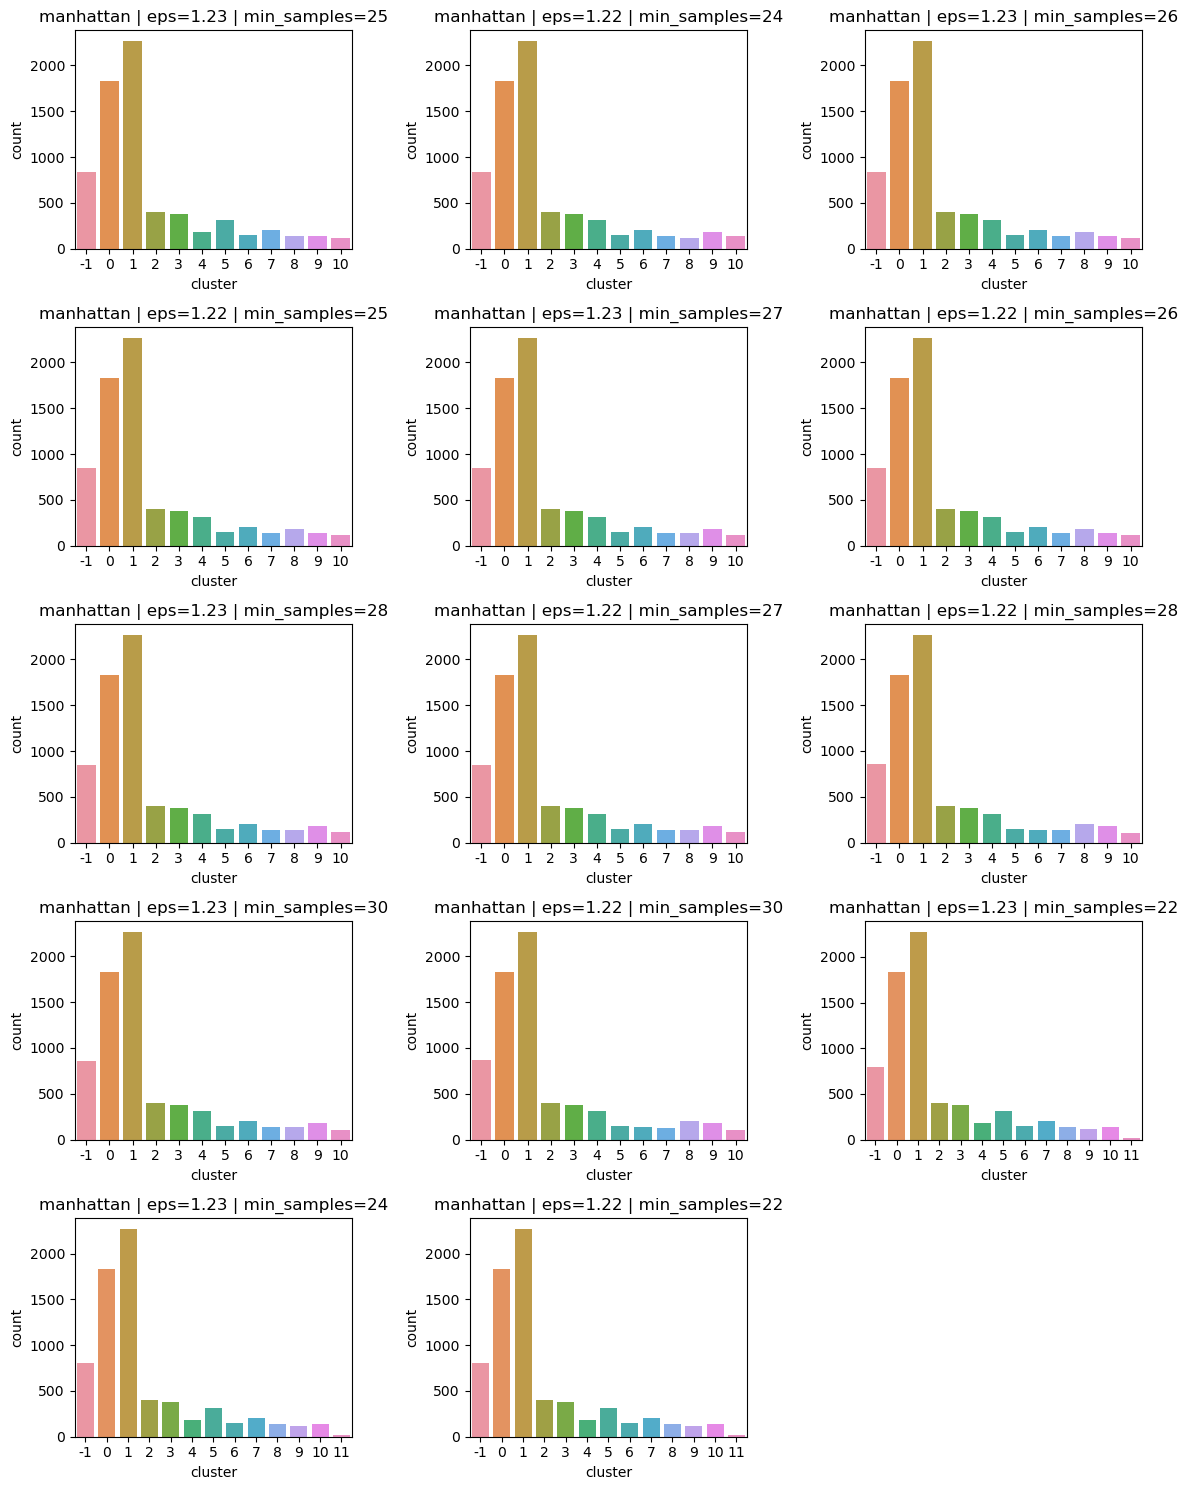

In [13]:

ncols = 3  # more columns, smaller plots
nrows = int(np.ceil(len(filter_df) / ncols))

fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * 4, nrows * 3)
)
axes = np.array(axes).reshape(-1)

last_idx = -1
for idx, row in enumerate(filter_df.itertuples(index=False)):
    df_scaled["cluster"] = models_results[(row.metric, row.eps, row.min_samples)]["labels"]
    sns.countplot(data=df_scaled, x="cluster", ax=axes[idx])
    axes[idx].set_title(f"{row.metric} | eps={row.eps} | min_samples={row.min_samples}")
    last_idx = idx

# hide unused axes if the grid is larger than the data
for j in range(last_idx + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()

Silhouette Score: 0.1359
Noise percentage: 11.58%


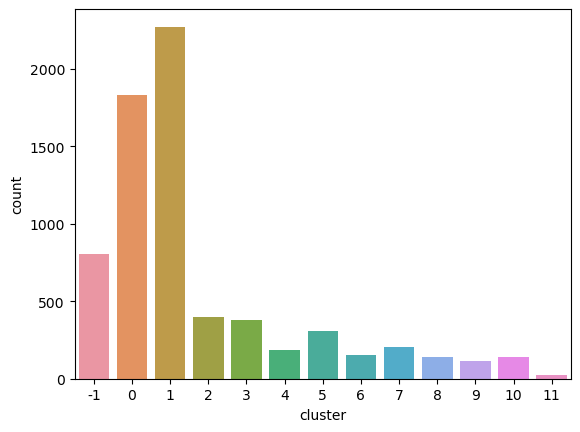

In [11]:
# Testing one model
from sklearn.cluster import DBSCAN
metric = 'manhattan'
eps_test = 1.23
min_samp_test = 24
df_scaled_test = df_scaled.drop(columns=["cluster"]).copy()

dbscan_test = DBSCAN(eps=eps_test, min_samples=min_samp_test, metric=metric)
labels_test = dbscan_test.fit_predict(df_scaled_test)

# Calculate silhouette BEFORE adding cluster column
sil_test = silhouette_score(df_scaled_test, labels_test)

# NOW add the cluster column for plotting
df_scaled_test["cluster"] = labels_test
sns.countplot(data=df_scaled_test, x="cluster")

print(f"Silhouette Score: {sil_test:.4f}")
print(f'Noise percentage: {list(labels_test).count(-1) / len(df_scaled_test) * 100:.2f}%')